<a href="https://colab.research.google.com/github/manhduc07/LMAO/blob/main/KNN_pokemon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Thêm Các Thư Viện Cần Thiết
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt
from matplotlib import image
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
import random
from matplotlib.colors import ListedColormap
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Đọc dữ liệu

In [ ]:
# đọc dữ liệu
pokemon_stats = pd.read_csv('pokemon.csv')
pokemon_stats.shape

(801, 41)

In [ ]:
pokemon_stats.columns

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary'],
      dtype='object')

In [ ]:
pokemon_stats.isna().sum()

abilities              0
against_bug            0
against_dark           0
against_dragon         0
against_electric       0
against_fairy          0
against_fight          0
against_fire           0
against_flying         0
against_ghost          0
against_grass          0
against_ground         0
against_ice            0
against_normal         0
against_poison         0
against_psychic        0
against_rock           0
against_steel          0
against_water          0
attack                 0
base_egg_steps         0
base_happiness         0
base_total             0
capture_rate           0
classfication          0
defense                0
experience_growth      0
height_m              20
hp                     0
japanese_name          0
name                   0
percentage_male       98
pokedex_number         0
sp_attack              0
sp_defense             0
speed                  0
type1                  0
type2                384
weight_kg             20
generation             0


Thống kê số pokemon

In [ ]:
pokemon_stats_small = pokemon_stats[['name','type1','type2','classfication','base_total','attack','defense','hp','sp_attack','sp_defense','speed','height_m','weight_kg']]
pokemon_stats_small.head()

,name,type1,type2,classfication,base_total,attack,defense,hp,sp_attack,sp_defense,speed,height_m,weight_kg
0,Bulbasaur,grass,poison,Seed Pokémon,318,49,49,45,65,65,45,0.7,6.9
1,Ivysaur,grass,poison,Seed Pokémon,405,62,63,60,80,80,60,1.0,13.0
2,Venusaur,grass,poison,Seed Pokémon,625,100,123,80,122,120,80,2.0,100.0
3,Charmander,fire,NaN,Lizard Pokémon,309,52,43,39,60,50,65,0.6,8.5
4,Charmeleon,fire,NaN,Flame Pokémon,405,64,58,58,80,65,80,1.1,19.0


array([[<Axes: title={'center': 'base_total'}>,
        <Axes: title={'center': 'attack'}>,
        <Axes: title={'center': 'defense'}>],
       [<Axes: title={'center': 'hp'}>,
        <Axes: title={'center': 'sp_attack'}>,
        <Axes: title={'center': 'sp_defense'}>],
       [<Axes: title={'center': 'speed'}>,
        <Axes: title={'center': 'height_m'}>,
        <Axes: title={'center': 'weight_kg'}>]], dtype=object)

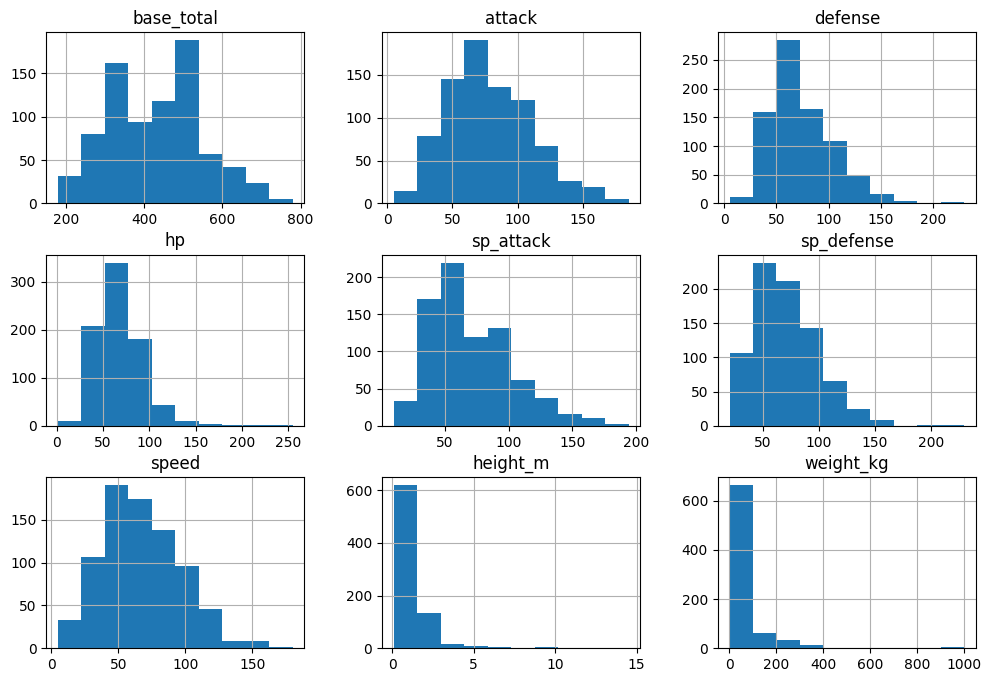

In [ ]:
pokemon_stats_small.hist(['base_total','attack','defense','hp','sp_attack','sp_defense','speed','height_m','weight_kg'],figsize=(12,8))

Text(0.5, 1.0, 'primary type')

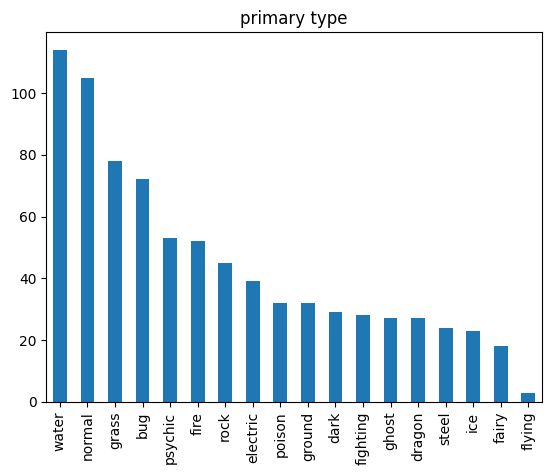

In [ ]:
pokemon_stats_small['type1'].value_counts().plot.bar()
plt.title('primary type')

Text(0.5, 1.0, 'secondary type')

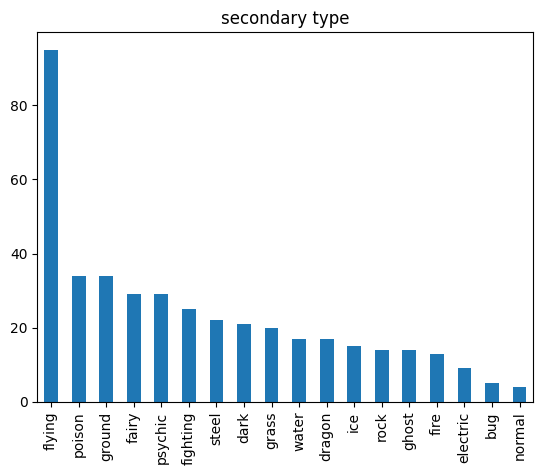

In [ ]:
pokemon_stats_small['type2'].value_counts().plot.bar()
plt.title('secondary type')

Text(0.5, 1.0, 'secondary type')

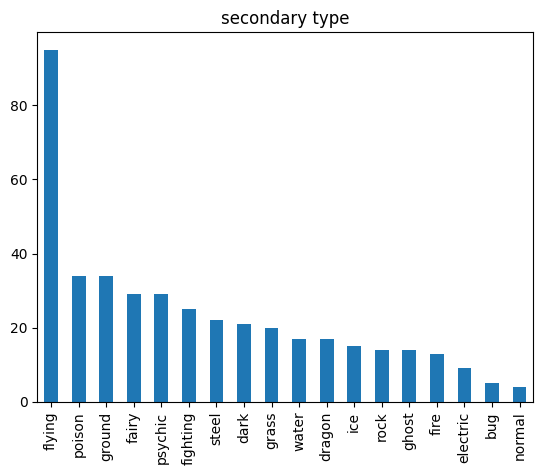

In [ ]:
pokemon_stats_small['type2'].value_counts().plot.bar()
plt.title('secondary type')

In [ ]:
pokemon_stats_small['classfication'].value_counts().head(25)

Dragon Pokémon         8
Mouse Pokémon          6
Mushroom Pokémon       6
Flame Pokémon          5
Balloon Pokémon        5
Fox Pokémon            5
Fairy Pokémon          5
Seed Pokémon           4
Bat Pokémon            4
Drill Pokémon          4
Poison Pin Pokémon     4
Land Spirit Pokémon    4
Bagworm Pokémon        4
Fruit Pokémon          4
Cocoon Pokémon         4
Tadpole Pokémon        4
Sea Lion Pokémon       3
Puppy Pokémon          3
Scaly Pokémon          3
Bivalve Pokémon        3
Mud Fish Pokémon       3
Gear Pokémon           3
EleFish Pokémon        3
Electric Pokémon       3
Virtual Pokémon        3
Name: classfication, dtype: int64

Sức Mạnh các loại

In [ ]:
against_cols = ['name','type1']
against_cols.extend([col for col in pokemon_stats.columns if 'against' in col])
pokemon_against = pokemon_stats[against_cols]
pokemon_against.set_index('name')

,type1,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water
name,,,,,,,,,,,,,,,,,,,
Bulbasaur,grass,1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5
Ivysaur,grass,1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5
Venusaur,grass,1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5
Charmander,fire,0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0
Charmeleon,fire,0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Celesteela,steel,0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.5,1.0,0.25,0.0,1.0,0.5,0.0,0.5,1.0,0.5,1.0
Kartana,grass,1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,1.0,0.25,1.0,1.0,0.5,0.0,0.5,0.5,0.5,0.5
Guzzlord,dark,2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.0,0.5,0.50,1.0,2.0,1.0,1.0,0.0,1.0,1.0,0.5


array([[<Axes: title={'center': 'against_bug'}>,
        <Axes: title={'center': 'against_dark'}>,
        <Axes: title={'center': 'against_dragon'}>,
        <Axes: title={'center': 'against_electric'}>],
       [<Axes: title={'center': 'against_fairy'}>,
        <Axes: title={'center': 'against_fight'}>,
        <Axes: title={'center': 'against_fire'}>,
        <Axes: title={'center': 'against_flying'}>],
       [<Axes: title={'center': 'against_ghost'}>,
        <Axes: title={'center': 'against_grass'}>,
        <Axes: title={'center': 'against_ground'}>,
        <Axes: title={'center': 'against_ice'}>],
       [<Axes: title={'center': 'against_normal'}>,
        <Axes: title={'center': 'against_poison'}>,
        <Axes: title={'center': 'against_psychic'}>,
        <Axes: title={'center': 'against_rock'}>],
       [<Axes: title={'center': 'against_steel'}>,
        <Axes: title={'center': 'against_water'}>, <Axes: >, <Axes: >]],
      dtype=object)

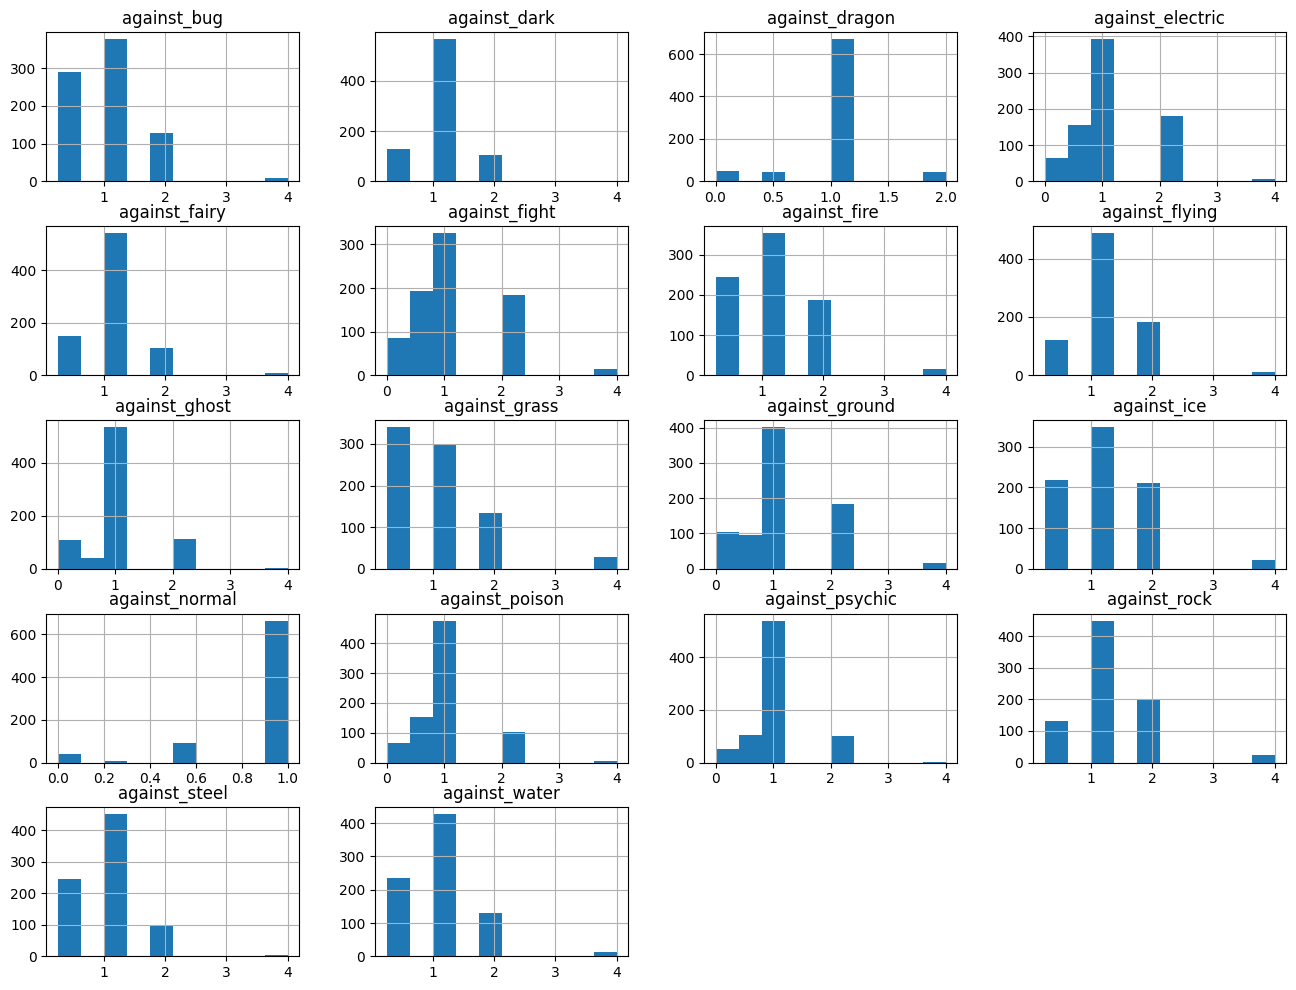

In [ ]:
pokemon_against.hist(against_cols,figsize=(16,12))

Thêm dataset hình ảnh vào

In [ ]:
#Đặt đường dẫn đến thư mục chứa hình ảnh Pokémon
image_directory = "/content/drive/MyDrive/archive/images/images/"
#Lấy danh sách tất cả các tệp hình ảnh trong thư mục.
imgs = os.listdir(image_directory)
#Tạo một DataFrame với hai cột:
pokemon_filenames = pd.DataFrame([[x.split('.')[0].split('-')[0] for x in imgs],imgs]).T
pokemon_filenames.columns = ['name','filepath']
pokemon_filenames.set_index('name')

,filepath
name,
breloom,breloom.png
carvanha,carvanha.png
blitzle,blitzle.png
aipom,aipom.png
bronzong,bronzong.png
...,...
rowlet,rowlet.jpg
mareanie,mareanie.jpg
oddish,oddish.png


Tạo tên nhất quán cho các tập dữ liệu

In [ ]:
pokemon_filenames['name'].replace({'farfetchd':"farfetch'd",
                            'flabebe':'flabébé',
                            'hakamo':'hakamo-o',
                            'ho':'ho-oh',
                            'jangmo':'jangmo-o',
                            'kommo':'kommo-o',
                            'mr':'mr. mime',
                            'mime':'mime jr.',
                            'type':'type: null'},inplace=True)

In [ ]:
pokemon_filenames.loc[pokemon_filenames['filepath']=='nidoran-f.png','name'] = 'nidoran (f)'
pokemon_filenames.loc[pokemon_filenames['filepath']=='nidoran-m.png','name'] = 'nidoran (m)'
pokemon_filenames.loc[pokemon_filenames['filepath']=='tapu-fini.jpg','name'] = 'tapu fini'
pokemon_filenames.loc[pokemon_filenames['filepath']=='tapu-koko.jpg','name'] = 'tapu koko'
pokemon_filenames.loc[pokemon_filenames['filepath']=='tapu-bulu.jpg','name'] = 'tapu bulu'
pokemon_filenames.loc[pokemon_filenames['filepath']=='tapu-lele.jpg','name'] = 'tapu lele'
pokemon_filenames.loc[pokemon_filenames['filepath']=='porygon-z.png','name'] = 'porygon-z'

In [ ]:
pokemon_stats_small['name'] = pokemon_stats_small['name'].str.lower()
pokemon_stats_small['name'].replace({'nidoran♀':'nidoran (f)',
                                    'nidoran♂':'nidoran (m)'},inplace=True)

<ipython-input-54-f48aa2f22048>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pokemon_stats_small['name'] = pokemon_stats_small['name'].str.lower()
<ipython-input-54-f48aa2f22048>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pokemon_stats_small['name'].replace({'nidoran♀':'nidoran (f)',


In [ ]:
pokemon_against['name'] = pokemon_against['name'].str.lower()
pokemon_against['name'].replace({'nidoran♀':'nidoran (f)',
                                    'nidoran♂':'nidoran (m)'},inplace=True)

<ipython-input-55-2158242f85ee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pokemon_against['name'] = pokemon_against['name'].str.lower()
<ipython-input-55-2158242f85ee>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pokemon_against['name'].replace({'nidoran♀':'nidoran (f)',


Dataset sau khi đã được nhất quán

In [ ]:
pokemon_joined = pokemon_stats_small.merge(pokemon_filenames,how='outer',indicator=True)
pokemon_joined

,name,type1,type2,classfication,base_total,attack,defense,hp,sp_attack,sp_defense,speed,height_m,weight_kg,filepath,_merge
0,bulbasaur,grass,poison,Seed Pokémon,318.0,49.0,49.0,45.0,65.0,65.0,45.0,0.7,6.9,bulbasaur.png,both
1,ivysaur,grass,poison,Seed Pokémon,405.0,62.0,63.0,60.0,80.0,80.0,60.0,1.0,13.0,ivysaur.png,both
2,venusaur,grass,poison,Seed Pokémon,625.0,100.0,123.0,80.0,122.0,120.0,80.0,2.0,100.0,venusaur.png,both
3,charmander,fire,NaN,Lizard Pokémon,309.0,52.0,43.0,39.0,60.0,50.0,65.0,0.6,8.5,charmander.png,both
4,charmeleon,fire,NaN,Flame Pokémon,405.0,64.0,58.0,58.0,80.0,65.0,80.0,1.1,19.0,charmeleon.png,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
804,zeraora,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,zeraora.jpg,right_only
805,meltan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,meltan.jpg,right_only
806,poipole,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,poipole.jpg,right_only
807,stakataka,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,stakataka.jpg,right_only


In [ ]:
 # in ra danh sách các Pokémon chỉ có trong tập dữ liệu Pokémon gốc
print(sorted(list(pokemon_joined[pokemon_joined['_merge']=='left_only']['name'])))

[]


In [ ]:
# in ra danh sách các Pokémon chỉ có trong tập dữ liệu hình ảnh Pokémon
print(sorted(list(pokemon_joined[pokemon_joined['_merge']=='right_only']['name'])))

['blacephalon', 'marshadow', 'melmetal', 'meltan', 'naganadel', 'poipole', 'stakataka', 'zeraora']


In [ ]:
pokemon_data = pokemon_joined[pokemon_joined['_merge']=='both'].drop('_merge',axis=1)
pokemon_data.set_index('name')

,type1,type2,classfication,base_total,attack,defense,hp,sp_attack,sp_defense,speed,height_m,weight_kg,filepath
name,,,,,,,,,,,,,
bulbasaur,grass,poison,Seed Pokémon,318.0,49.0,49.0,45.0,65.0,65.0,45.0,0.7,6.9,bulbasaur.png
ivysaur,grass,poison,Seed Pokémon,405.0,62.0,63.0,60.0,80.0,80.0,60.0,1.0,13.0,ivysaur.png
venusaur,grass,poison,Seed Pokémon,625.0,100.0,123.0,80.0,122.0,120.0,80.0,2.0,100.0,venusaur.png
charmander,fire,NaN,Lizard Pokémon,309.0,52.0,43.0,39.0,60.0,50.0,65.0,0.6,8.5,charmander.png
charmeleon,fire,NaN,Flame Pokémon,405.0,64.0,58.0,58.0,80.0,65.0,80.0,1.1,19.0,charmeleon.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...
celesteela,steel,flying,Launch Pokémon,570.0,101.0,103.0,97.0,107.0,101.0,61.0,9.2,999.9,celesteela.jpg
kartana,grass,steel,Drawn Sword Pokémon,570.0,181.0,131.0,59.0,59.0,31.0,109.0,0.3,0.1,kartana.jpg
guzzlord,dark,dragon,Junkivore Pokémon,570.0,101.0,53.0,223.0,97.0,53.0,43.0,5.5,888.0,guzzlord.jpg


In [ ]:
pokemon_against_joined = pokemon_against.merge(pokemon_filenames,how='inner')
pokemon_against_joined

,name,type1,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,...,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,filepath
0,bulbasaur,grass,1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,...,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,bulbasaur.png
1,ivysaur,grass,1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,...,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,ivysaur.png
2,venusaur,grass,1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,...,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,venusaur.png
3,charmander,fire,0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,...,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,charmander.png
4,charmeleon,fire,0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,...,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,charmeleon.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,celesteela,steel,0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.5,...,0.25,0.0,1.0,0.5,0.0,0.5,1.0,0.5,1.0,celesteela.jpg
797,kartana,grass,1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,...,0.25,1.0,1.0,0.5,0.0,0.5,0.5,0.5,0.5,kartana.jpg
798,guzzlord,dark,2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.0,...,0.50,1.0,2.0,1.0,1.0,0.0,1.0,1.0,0.5,guzzlord.jpg
799,necrozma,psychic,2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,...,1.00,1.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0,necrozma.jpg


Tạo mô hình

In [ ]:
# Lấy giá trị của thuộc tính 'type1'
y = pokemon_against.pop('type1')

# Loại bỏ cột 'name'
X = pokemon_against.drop('name',axis=1)
# y chứa các nhãn nhóm, còn X chứa các giá trị của các thuộc tính.

In [ ]:
random_state=0
#random_state=0 có nghĩa là thuật toán sẽ luôn tạo ra cùng một chuỗi số ngẫu nhiên, bất kể bạn chạy mã bao nhiêu lần

In [ ]:
# Chia tập dữ liệu thành hai tập dữ liệu đào tạo và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)

# Hiển thị 5 dòng đầu tiên của tập dữ liệu đào tạo
X_train.head()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water
364,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,0.25,1.0,1.0,1.0,2.0,1.0,0.5
458,2.0,1.0,1.0,0.5,1.0,2.0,4.0,2.0,1.0,0.5,0.5,1.00,1.0,2.0,1.0,2.0,2.0,0.5
76,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.5,2.0,0.50,1.0,1.0,1.0,2.0,0.5,2.0
64,2.0,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,1.0,1.0,1.00,1.0,1.0,0.5,1.0,1.0,1.0
638,0.5,0.5,1.0,1.0,2.0,2.0,0.5,1.0,1.0,2.0,2.0,1.00,0.5,0.5,2.0,0.5,2.0,2.0


In [ ]:
X_train2,X_test2,y_train2,y_test2 = train_test_split(pokemon_against,y,test_size=0.3,random_state=random_state)
X_train2.head()

,name,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water
159,feraligatr,1.0,1.0,1.0,2.0,1.0,1.00,0.5,1.0,1.0,2.00,1.0,0.5,1.0,1.0,1.0,1.0,0.5,0.5
337,solrock,2.0,2.0,1.0,1.0,1.0,1.00,0.5,0.5,2.0,2.00,2.0,1.0,0.5,0.5,0.5,1.0,2.0,2.0
77,rapidash,0.5,1.0,1.0,1.0,0.5,1.00,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0
651,chesnaught,1.0,0.5,1.0,0.5,2.0,1.00,2.0,4.0,1.0,0.50,0.5,2.0,1.0,2.0,2.0,0.5,1.0,0.5
283,masquerain,0.5,1.0,1.0,2.0,1.0,0.25,2.0,2.0,1.0,0.25,0.0,2.0,1.0,1.0,1.0,4.0,1.0,1.0


**KNN**

KNN phân loại Pokémon dựa trên các đặc điểm của hình ảnh Pokémon. Các đặc điểm này bao gồm màu sắc, hình dạng, kích thước, và các đặc điểm khác.

KNN hoạt động bằng cách tìm các Pokémon có đặc điểm tương tự với Pokémon đang được phân loại. Pokémon có nhiều đặc điểm tương tự nhất với Pokémon đang được phân loại sẽ được coi là Pokémon có cùng loại với Pokémon đang được phân loại.

Ví dụ, nếu chúng ta đang cố gắng phân loại một Pokémon có màu xanh lá cây, hình dạng tròn, và kích thước nhỏ, KNN sẽ tìm các Pokémon khác có màu xanh lá cây, hình dạng tròn, và kích thước nhỏ. Nếu có nhiều Pokémon có các đặc điểm này, KNN sẽ coi Pokémon có đặc điểm tương tự nhất với Pokémon đang được phân loại là Pokémon có cùng loại với Pokémon đang được phân loại.

In [ ]:
%%time
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

y_pred_knn = knn.predict(X_test)

CPU times: user 88.4 ms, sys: 0 ns, total: 88.4 ms
Wall time: 92.2 ms


In [ ]:
cluster_accuracy = np.sum(y_pred_knn == y_test)/len(y_test)
cluster_accuracy

0.84472049689441

In [ ]:
types = list(y_train.unique())
type_color = ["#66EBFF","#8ED752", "#F95643","#FB61B4","#CDBD72","#BBBDAF",
             "#F0CA42","#8B76FF","#F9AEFE","#53AFFE","#C3D221","#A35449",
              "#8E6856","#7673DA","#AD5CA2","#F8E64E","#C3C1D7","#75A4F9"]
color_dict = dict(zip(types,type_color))
color_dict

{'ice': '#66EBFF',
 'grass': '#8ED752',
 'fire': '#F95643',
 'psychic': '#FB61B4',
 'rock': '#CDBD72',
 'normal': '#BBBDAF',
 'ground': '#F0CA42',
 'dragon': '#8B76FF',
 'fairy': '#F9AEFE',
 'water': '#53AFFE',
 'bug': '#C3D221',
 'fighting': '#A35449',
 'dark': '#8E6856',
 'ghost': '#7673DA',
 'poison': '#AD5CA2',
 'electric': '#F8E64E',
 'steel': '#C3C1D7',
 'flying': '#75A4F9'}

In [ ]:
#được sử dụng để hiển thị các hình ảnh Pokémon này. Hàm này tạo một lưới hình ảnh, với mỗi hình ảnh đại diện cho một Pokémon. Tên Pokémon và nhãn loại của Pokémon được hiển thị ở trên mỗi hình ảnh
def display_by_type(pokemon_type, num):

    filepaths = []
    filepaths.append(get_filepaths(y_test, pokemon_type, num)) # thực tế
    filepaths.append(get_filepaths(pd.Series(y_pred_knn, index=y_test.index), pokemon_type, num)) # KNN

    cols = num
    rows = 2

    fig = plt.figure(figsize=(20, 12))
    plt.text(0.04, 0.8, 'thực tế', fontsize=14, transform=plt.gcf().transFigure)
    plt.text(0.04, 0.4, 'KNN', fontsize=14, transform=plt.gcf().transFigure)
    plt.box(False)
    plt.xticks([])
    plt.yticks([])

    for i in range(rows):
        for j in range(cols):
            ax = fig.add_subplot(rows, cols, i * cols + j + 1)
            if j >= len(filepaths[i]):
                plt.box(False)
                plt.xticks([])
                plt.yticks([])
                continue
            filepath, name, correct = filepaths[i][j]
            img = image.imread('/content/drive/MyDrive/archive/images/images/' + filepath)
            plt.imshow(img)
            plt.title(name + ': ' + correct, color=color_dict[correct])
            plt.xticks([])
            plt.yticks([])

            if i == 0:
                spine_color = 'gray'
            elif correct == pokemon_type:
                spine_color = 'green'
            else:
                spine_color = 'red'
            for spine in ax.spines.values():
                spine.set_edgecolor(spine_color)
    plt.show()
#get_filepaths được sử dụng để lấy các hình ảnh Pokémon có loại đã chỉ định. Hàm này trả về một danh sách các tuple, mỗi tuple chứa đường dẫn đến hình ảnh, tên Pokémon, và nhãn loại của Pokémon đó.
def get_filepaths(dataset, pokemon_type, num):

    idxs = list(dataset[dataset == pokemon_type].index)
    if len(idxs) > num:
        idxs = random.sample(idxs, num)
    correct = y_test[idxs]
    pokemon = list(pokemon_against_joined['filepath'][idxs])
    names = list(pokemon_against_joined['name'][idxs])
    return list(zip(pokemon, names, correct))

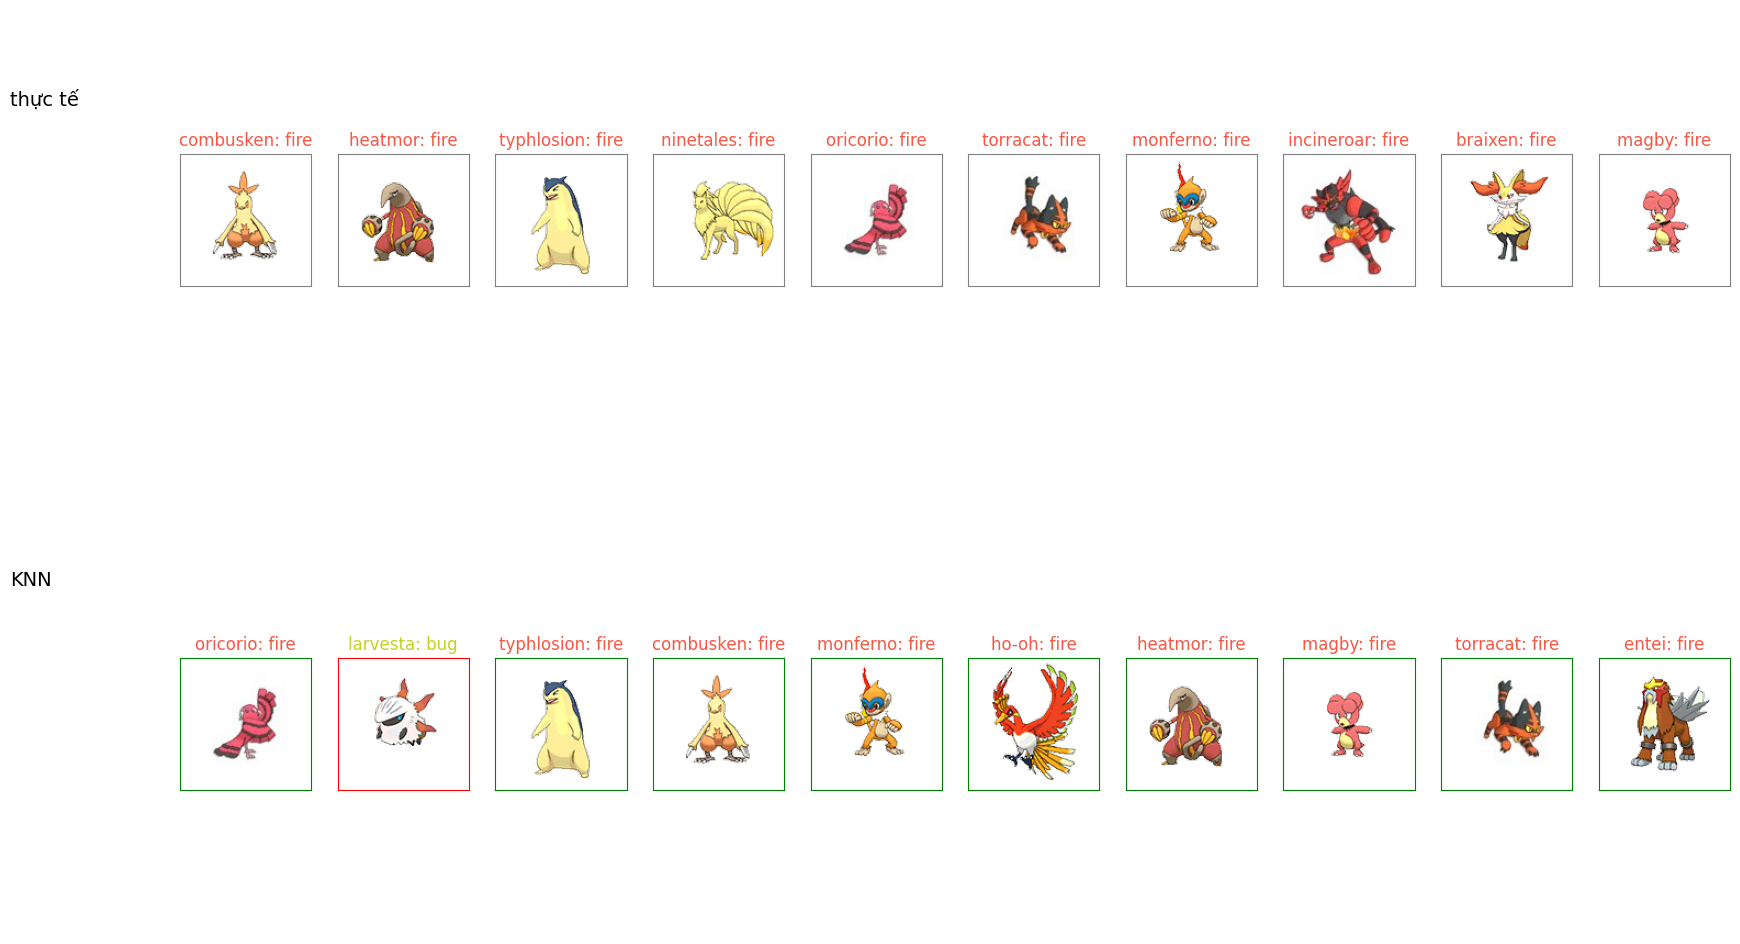

CPU times: user 1.04 s, sys: 123 ms, total: 1.16 s
Wall time: 1.08 s


In [ ]:
%%time
display_by_type('fire',10)

In [ ]:
def display(num):
    indices = random.sample(list(y_test.index), num)

    filepaths = []
    filepaths.append(get_filepaths_indices(y_test, indices))  # truth

    # Train KNN model
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)
    y_pred_knn = knn.predict(X_test)
    filepaths.append(get_filepaths_indices(pd.Series(y_pred_knn, index=y_test.index), indices))  # knn

    cols = num
    rows = 2

    fig = plt.figure(figsize=(25, 10))
    plt.text(0.05, 0.8, 'Thực tế', fontsize=14, transform=plt.gcf().transFigure)
    plt.text(0.05, 0.6, 'KNN', fontsize=14, transform=plt.gcf().transFigure)
    plt.box(False)
    plt.xticks([])
    plt.yticks([])

    for i in range(rows):
        for j in range(cols):
            ax = fig.add_subplot(rows, cols, i * cols + j + 1)
            filepath, p_type = filepaths[i][j]
            img = image.imread(image_directory + filepath)
            plt.imshow(img)
            plt.title(p_type, color=color_dict[p_type])
            plt.xticks([])
            plt.yticks([])

            if i == 0:
                spine_color = 'gray'
            elif p_type == filepaths[0][j][1]:  # correct
                spine_color = 'green'
            else:
                spine_color = 'red'
            for spine in ax.spines.values():
                spine.set_edgecolor(spine_color)
    plt.show()

def get_filepaths_indices(dataset, indices):
    types = dataset[indices]
    pokemon = list(pokemon_against_joined['filepath'][indices])
    return list(zip(pokemon, types))

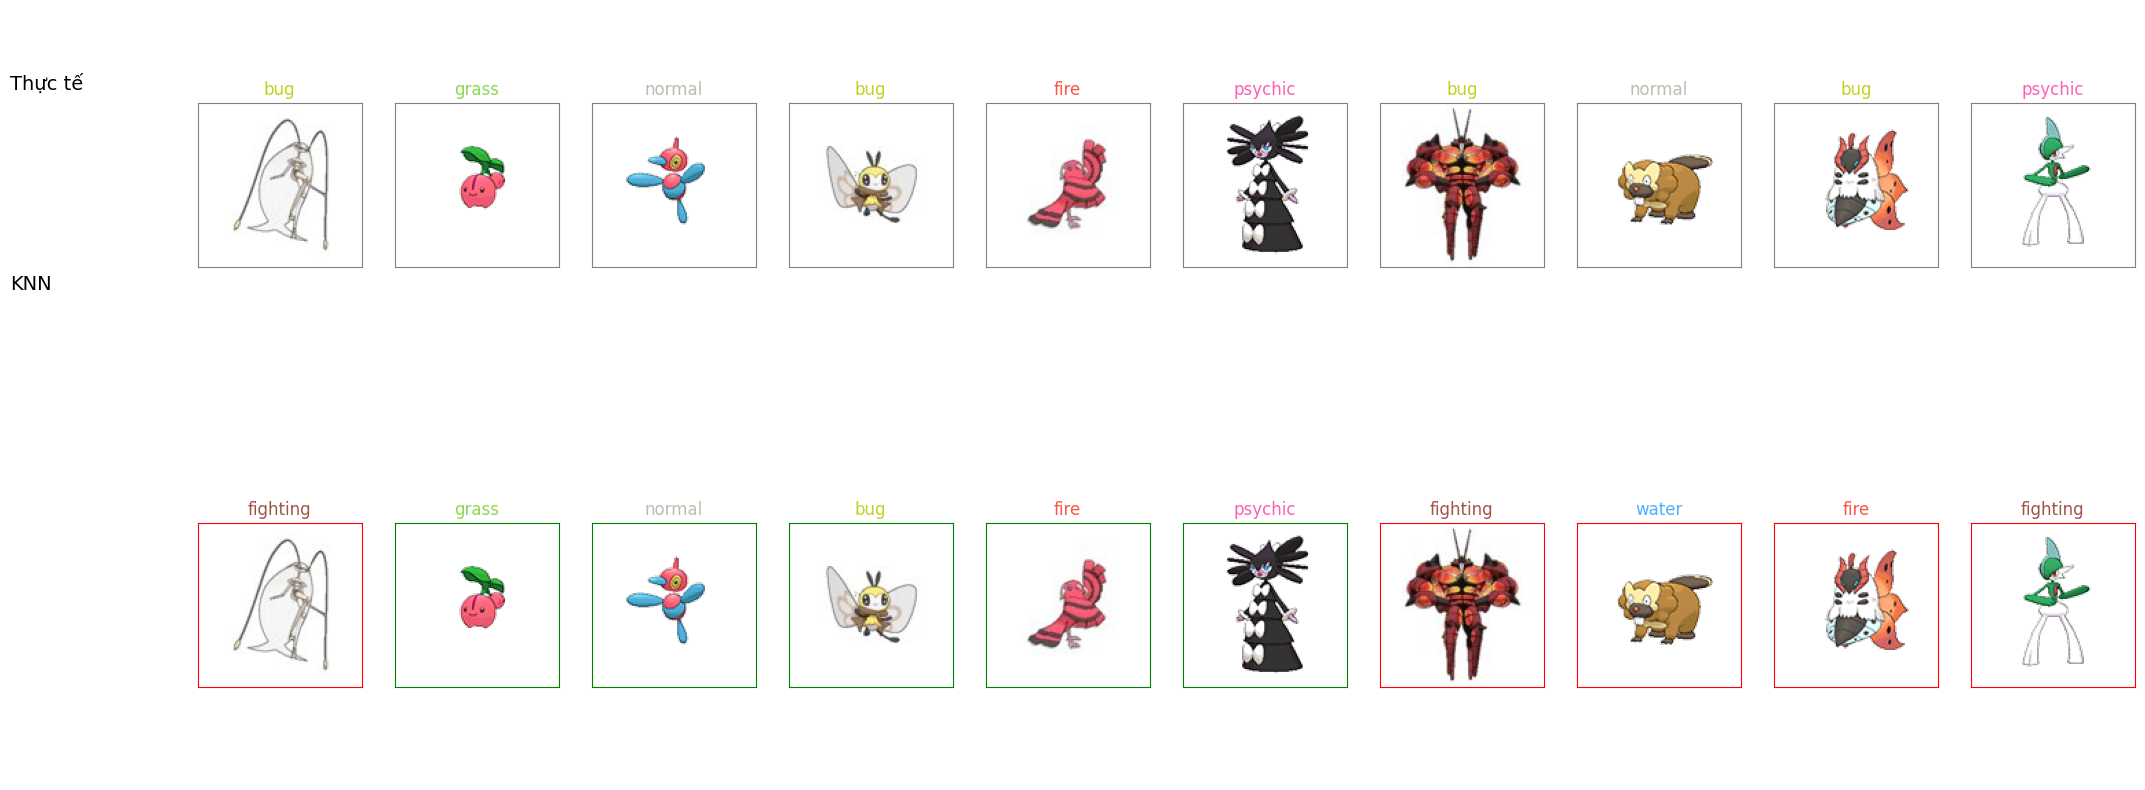

CPU times: user 1.41 s, sys: 124 ms, total: 1.53 s
Wall time: 1.44 s


In [ ]:
%%time
display(10)